<a href="https://colab.research.google.com/github/apondi-911/CNN_Models/blob/main/flowerRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [ ]:
data_dir='/content/drive/MyDrive/flower-dataset'
os.listdir(data_dir)

['validation', 'train', 'Original', 'test']

## Split Data


In [ ]:
TRAIN_DIR='/content/drive/MyDrive/flower-dataset/train'
TEST_DIR='/content/drive/MyDrive/flower-dataset/test'
VAL_DIR='/content/drive/MyDrive/flower-dataset/validation'

## Augmentation and Data Preparation


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale = 1. / 255,
                    shear_range = 0.2,
                    zoom_range=0.2 ,
                    horizontal_flip=True)
train_set = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), batch_size=32 , class_mode='categorical')


Found 3540 images belonging to 5 classes.


In [ ]:

val_datagen = ImageDataGenerator(rescale = 1. / 255)

val_set = val_datagen.flow_from_directory(VAL_DIR, target_size=(224,224), batch_size=32 , class_mode='categorical')


Found 80 images belonging to 5 classes.


## Build the Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32 , kernel_size = (5,5) , padding='Same', activation='relu', input_shape=[224,224,3])  )
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))

model.add(tf.keras.layers.Conv2D(filters=64 , kernel_size = (5,5) , padding='Same', activation='relu'  ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=96 , kernel_size = (5,5) , padding='Same', activation='relu'  ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=96 , kernel_size = (5,5) , padding='Same', activation='relu'  ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

#Flatten before the Dense layer

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense (units=512 , activation='relu'))

# the last layer
model.add(tf.keras.layers.Dense(units=5 , activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        1

In [ ]:
model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy']   )

In [ ]:
history = model.fit (x=train_set, validation_data=val_set, batch_size=32 , epochs=20)


Epoch 1/20
111/111 [==============================] - 494s 4s/step - loss: 1.5684 - accuracy: 0.3147 - val_loss: 1.2140 - val_accuracy: 0.5000
Epoch 2/20
111/111 [==============================] - 56s 508ms/step - loss: 1.2536 - accuracy: 0.4960 - val_loss: 0.9998 - val_accuracy: 0.5875
Epoch 3/20
111/111 [==============================] - 56s 508ms/step - loss: 1.0934 - accuracy: 0.5726 - val_loss: 0.8732 - val_accuracy: 0.6375
Epoch 4/20
111/111 [==============================] - 56s 506ms/step - loss: 0.9829 - accuracy: 0.6206 - val_loss: 0.9952 - val_accuracy: 0.6250
Epoch 5/20
111/111 [==============================] - 57s 510ms/step - loss: 0.9504 - accuracy: 0.6472 - val_loss: 0.7794 - val_accuracy: 0.7125
Epoch 6/20
111/111 [==============================] - 57s 513ms/step - loss: 0.8920 - accuracy: 0.6621 - val_loss: 0.8451 - val_accuracy: 0.6500
Epoch 7/20
111/111 [==============================] - 57s 515ms/step - loss: 0.8347 - accuracy: 0.6842 - val_loss: 0.8406 - val_accu

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc

[0.3146892786026001,
 0.49604520201683044,
 0.5725988745689392,
 0.6206214427947998,
 0.647175133228302,
 0.6621468663215637,
 0.6841807961463928,
 0.6997175216674805,
 0.712429404258728,
 0.7257062196731567,
 0.7225988507270813,
 0.7437853217124939,
 0.761864423751831,
 0.7658191919326782,
 0.7714689373970032,
 0.7711864113807678,
 0.7799435257911682,
 0.7824859023094177,
 0.8042373061180115,
 0.7923728823661804]

In [ ]:
val_acc

[0.5,
 0.5874999761581421,
 0.637499988079071,
 0.625,
 0.7124999761581421,
 0.6499999761581421,
 0.7124999761581421,
 0.625,
 0.699999988079071,
 0.6625000238418579,
 0.737500011920929,
 0.75,
 0.699999988079071,
 0.699999988079071,
 0.737500011920929,
 0.699999988079071,
 0.762499988079071,
 0.75,
 0.6875,
 0.7749999761581421]

## Plot

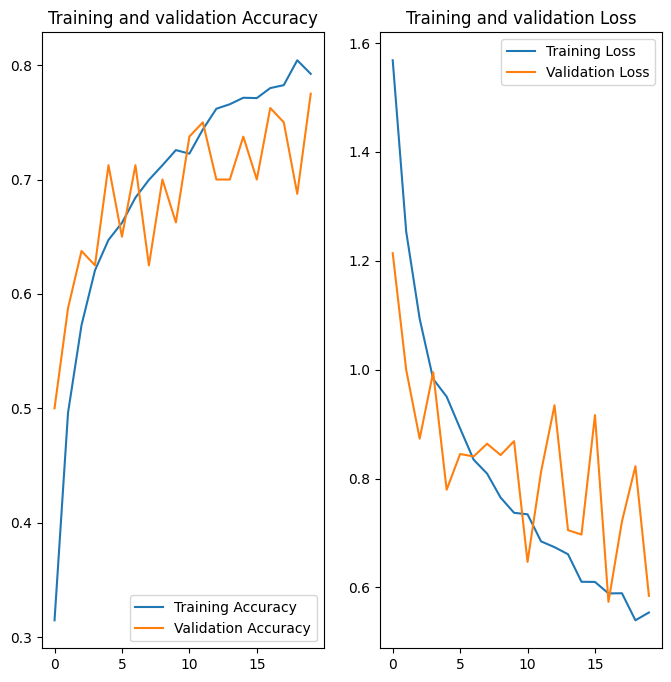

In [ ]:

epochs_range = range(20) # creating a sequence of number from 0 to 20

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss ,label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and validation Loss')

plt.show()


In [ ]:
model.save('/content/drive/MyDrive/flower_model/flower.h5')